## Importing required Libraries

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans 
from collections import Counter

## Loading and Exploring the Dataset

In [2]:
df = pd.read_csv('mcdonalds.csv')

In [3]:
df.shape

(1453, 15)

In [4]:
df.head()

yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male

In [5]:
df.tail()

yummy convenient spicy fattening greasy fast cheap tasty expensive  \
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  
1448      No        Yes  I hate it!-5   47         Once a year    Male  
1449     Yes         No            +2   36         Once a week  Female  
1450      No         No            +3   52        Once a month  Female  
1451     Yes         No            +4   41  Every three months    Male  
1452      No        Yes            -3   30  Every three months    Male

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
df.describe()

Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000

In [8]:
#Checkimg for null values
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

## Replacing incosistent values with more efficient values

In [10]:
df['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [11]:
df = df.replace(to_replace='I hate it!-5',value='-5')
df = df.replace(to_replace='I love it!+5',value='+5')

## Categorizing the 'Like' columns into grades
* Range: -1 to -5 Means Bad
* Range: 0 to 2 Means Average
* Range: 3 to 5 Means Good
* In this way we can easily segment and distinguish 'Bad' reviews from 'Good' reviews

In [13]:
df = df.replace(to_replace=['-5','-4','-3','-2','-1'],value='Bad')
df = df.replace(to_replace=['0','+1','+2'],value='Average')
df = df.replace(to_replace=['+3','+4','+5'],value='Good')

In [14]:
# MD_x = df.iloc[:, 0:11].apply(lambda x: (x == "Yes") * 1)

# col_means = np.round(df.mean(), 2)
# MD_x
df['yummy'] = df['yummy'].replace({'Yes': 1, 'No': 0})
df['convenient'] = df['convenient'].replace({'Yes': 1, 'No': 0})
df['spicy'] = df['spicy'].replace({'Yes': 1, 'No': 0})
df['fattening'] = df['fattening'].replace({'Yes': 1, 'No': 0})
df['greasy'] = df['greasy'].replace({'Yes': 1, 'No': 0})
df['fast'] = df['fast'].replace({'Yes': 1, 'No': 0})
df['cheap'] = df['cheap'].replace({'Yes': 1, 'No': 0})
df['tasty'] = df['tasty'].replace({'Yes': 1, 'No': 0})
df['healthy'] = df['healthy'].replace({'Yes': 1, 'No': 0})
df['disgusting'] = df['disgusting'].replace({'Yes': 1, 'No': 0})
df['expensive'] = df['expensive'].replace({'Yes': 1, 'No': 0})
df['Like'] = df['Like'].replace({'Bad': -1, 'Good': 1, 'Average':0})
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['VisitFrequency'] = df['VisitFrequency'].replace({'Never': 0, 'More than once a week':1,
                                                   'Once a week': 2, 'Once a month':3, 
                                                   'Every three months':4, 'Once a year':5})

In [15]:
df

yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  Like  Age  VisitFrequency  Gender  
0             1        0           0    -1   61               4       0  
1             1        0           0     0   51               4       0  
2             1        1           0     0   62               4       0  
3             0        0           1     1   69               2       0  
4             0        1           0     0   49               3       1  
...         ...      ...         ...   ...  ...             ...     ...  
1448          1        0           1    -1   47               5       1  
1449          0        1           0     0   36               2       0  
1450          1        0           0     1   52               3       0  
1451          0        1           0     1   41               4       1  
1452          1        0           1    -1   30               4       1  

[1453 rows x 15 columns]

In [16]:
df.corr()

yummy  convenient     spicy  fattening    greasy      fast  \
yummy           1.000000    0.253807  0.008742  -0.087027 -0.151853  0.106836   
convenient      0.253807    1.000000  0.028928   0.036451 -0.106948  0.243062   
spicy           0.008742    0.028928  1.000000  -0.041322  0.053932  0.020276   
fattening      -0.087027    0.036451 -0.041322   1.000000  0.319283  0.045600   
greasy         -0.151853   -0.106948  0.053932   0.319283  1.000000 -0.058212   
fast            0.106836    0.243062  0.020276   0.045600 -0.058212  1.000000   
cheap           0.105036    0.151574  0.017203  -0.026640 -0.073264  0.252133   
tasty           0.687280    0.289755  0.061154  -0.087561 -0.163536  0.145836   
expensive      -0.061727   -0.163961  0.045979   0.089134  0.147283 -0.201694   
healthy         0.247183    0.099230  0.106252  -0.338401 -0.211186  0.033596   
disgusting     -0.419852   -0.340797  0.032834   0.146054  0.321879 -0.137993   
Like            0.666354    0.302333 -0.023969  -0.157198 -0.258834  0.148471   
Age            -0.281653   -0.070597  0.146217  -0.139254 -0.233554 -0.020558   
VisitFrequency -0.075292    0.143280 -0.013707   0.013628 -0.022086  0.003175   
Gender         -0.062545   -0.041402  0.051015  -0.059707  0.021801 -0.049027   

                   cheap     tasty  expensive   healthy  disgusting      Like  \
yummy           0.105036  0.687280  -0.061727  0.247183   -0.419852  0.666354   
convenient      0.151574  0.289755  -0.163961  0.099230   -0.340797  0.302333   
spicy           0.017203  0.061154   0.045979  0.106252    0.032834 -0.023969   
fattening      -0.026640 -0.087561   0.089134 -0.338401    0.146054 -0.157198   
greasy         -0.073264 -0.163536   0.147283 -0.211186    0.321879 -0.258834   
fast            0.252133  0.145836  -0.201694  0.033596   -0.137993  0.148471   
cheap           1.000000  0.139485  -0.721593  0.130003   -0.125602  0.123818   
tasty           0.139485  1.000000  -0.104884  0.226271   -0.437086  0.609818   
expensive      -0.721593 -0.104884   1.000000 -0.069873    0.199748 -0.111999   
healthy         0.130003  0.226271  -0.069873  1.000000   -0.173722  0.275787   
disgusting     -0.125602 -0.437086   0.199748 -0.173722    1.000000 -0.509885   
Like            0.123818  0.609818  -0.111999  0.275787   -0.509885  1.000000   
Age             0.016958 -0.194576  -0.070851  0.021366    0.021612 -0.232918   
VisitFrequency -0.023430 -0.033031  -0.011411 -0.032405   -0.058042 -0.129571   
Gender         -0.116050 -0.044385   0.144113 -0.042455    0.069065 -0.043844   

                     Age  VisitFrequency    Gender  
yummy          -0.281653       -0.075292 -0.062545  
convenient     -0.070597        0.143280 -0.041402  
spicy           0.146217       -0.013707  0.051015  
fattening      -0.139254        0.013628 -0.059707  
greasy         -0.233554       -0.022086  0.021801  
fast           -0.020558        0.003175 -0.049027  
cheap           0.016958       -0.023430 -0.116050  
tasty          -0.194576       -0.033031 -0.044385  
expensive      -0.070851       -0.011411  0.144113  
healthy         0.021366       -0.032405 -0.042455  
disgusting      0.021612       -0.058042  0.069065  
Like           -0.232918       -0.129571 -0.043844  
Age             1.000000        0.087319 -0.019852  
VisitFrequency  0.087319        1.000000 -0.066984  
Gender         -0.019852       -0.066984  1.000000

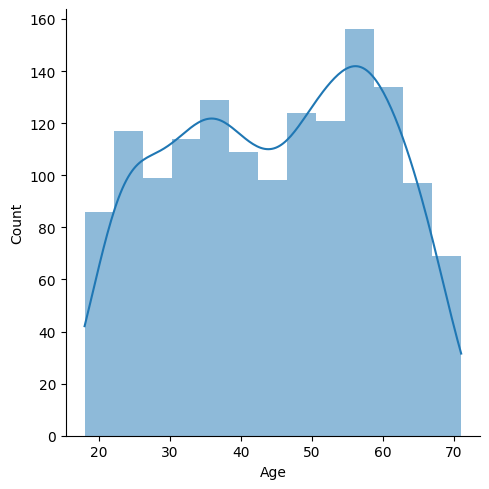

In [17]:
sns.displot(data=df, x = "Age",kde=True,edgecolor='none')



<AxesSubplot: xlabel='Gender', ylabel='count'>

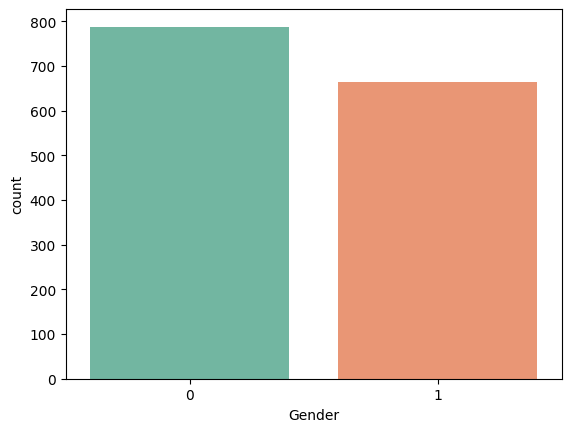

In [18]:
sns.countplot(data=df, x = 'Gender',palette = "Set2")

C:\Users\Manpreet\AppData\Local\Temp\ipykernel_14856\1434278997.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data=df, x="VisitFrequency", y="Age", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")


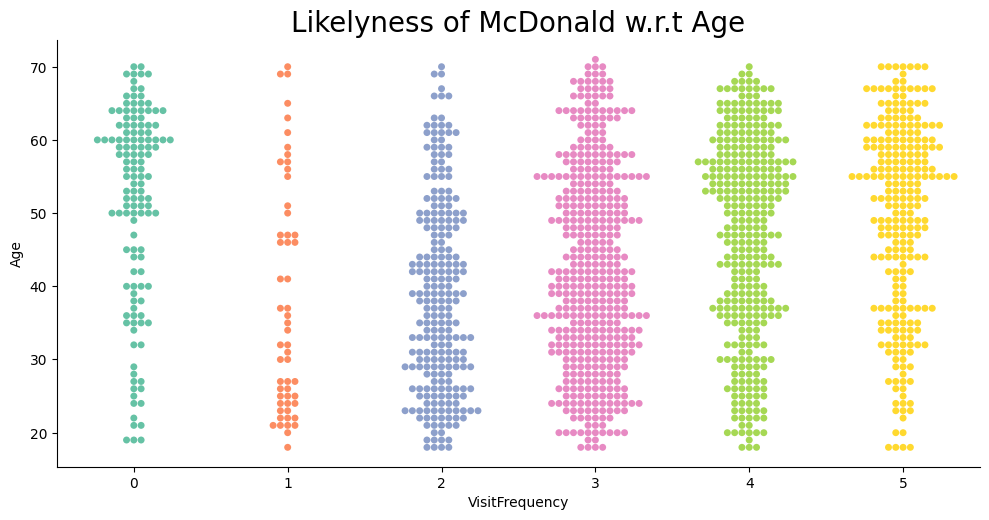

In [19]:
sns.catplot(data=df, x="VisitFrequency", y="Age", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

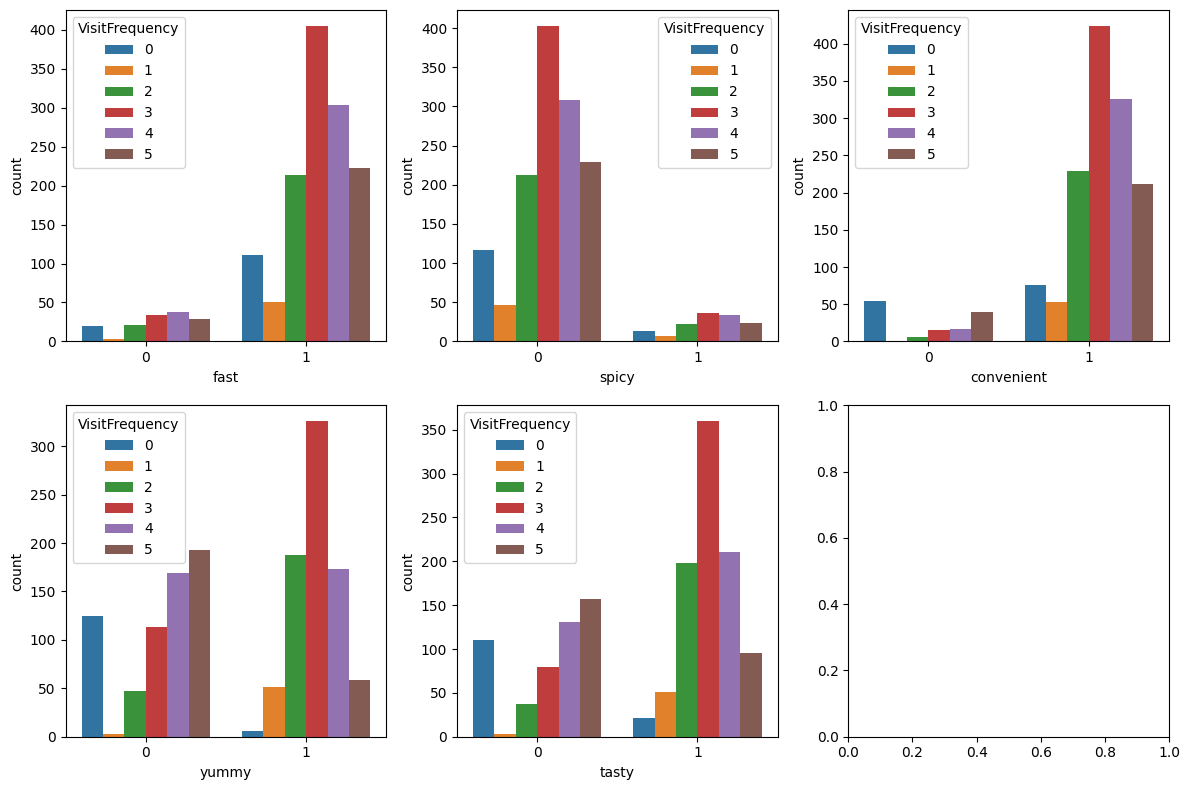

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
sns.countplot(data=df, x='fast', hue='VisitFrequency', ax=axs[0,0])
sns.countplot(data=df, x='spicy', hue='VisitFrequency', ax=axs[0,1])
sns.countplot(data=df, x='convenient', hue='VisitFrequency', ax=axs[0,2])
sns.countplot(data=df, x='yummy', hue='VisitFrequency', ax=axs[1,0])
sns.countplot(data=df, x='tasty', hue='VisitFrequency', ax=axs[1,1])
plt.tight_layout()
plt.show()


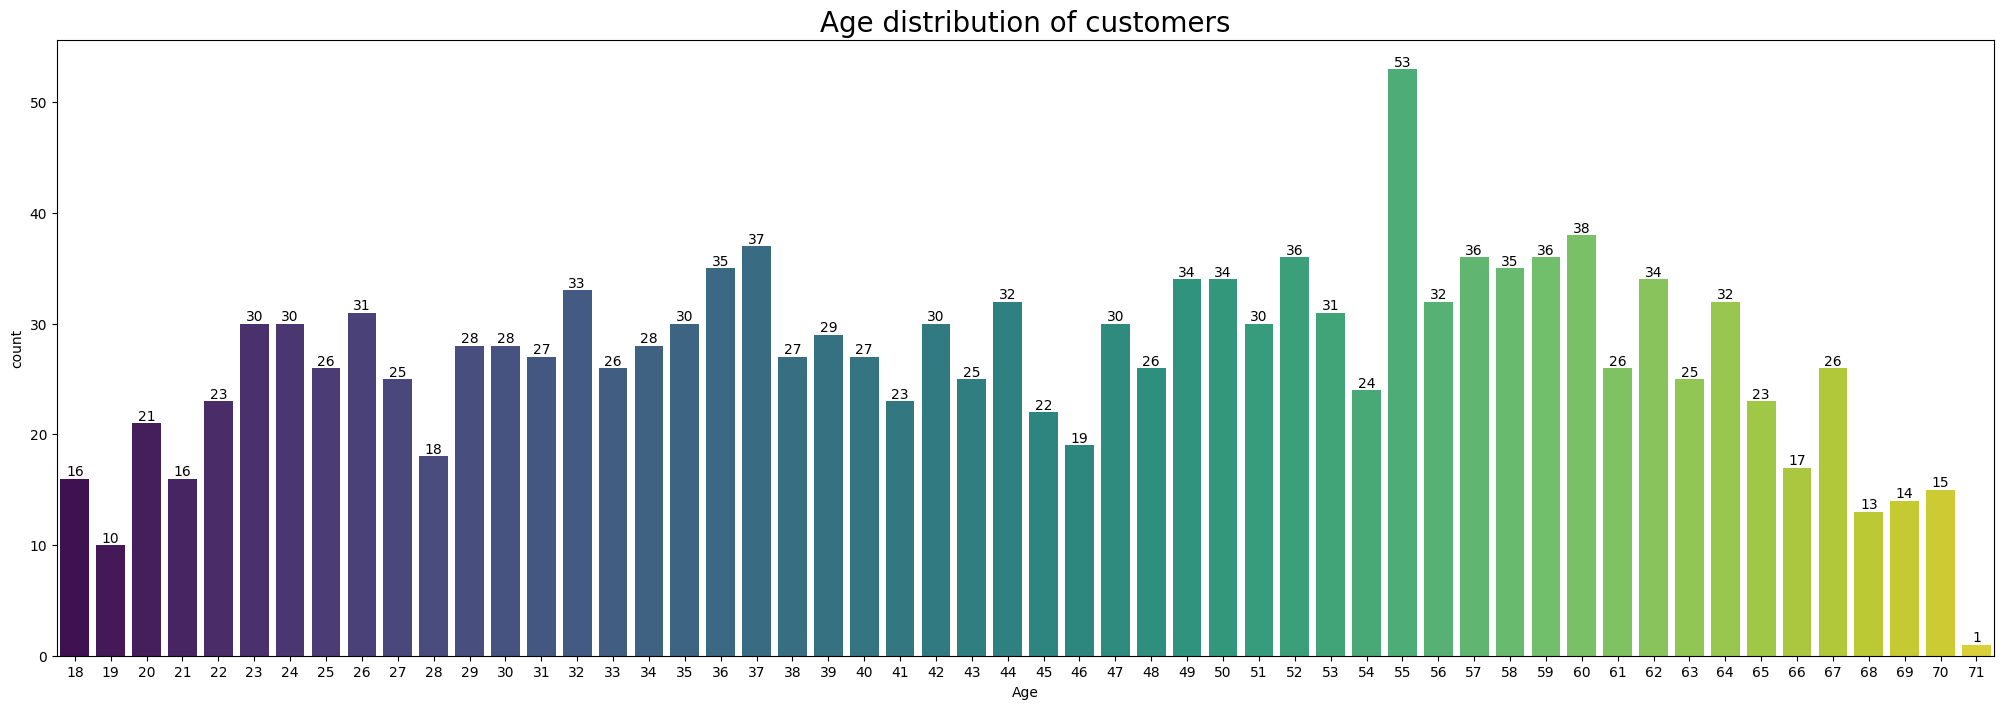

In [24]:
# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (25, 8)
data = sns.countplot(x=df['Age'], palette = 'viridis')
data.bar_label(data.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

## Applying Elbow Method

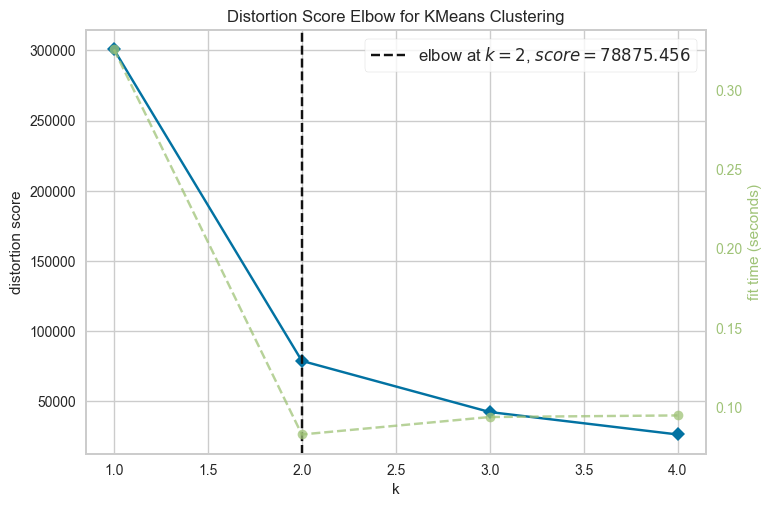

In [29]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,5)).fit(df)
visualizer.show();

## Applying the K-Means Clustering Algorithm

In [38]:
# k-means clustering 
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df)
df['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS) 
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

Labels: [1 1 1 ... 1 0 0]
WCSS: 78875.45552560646
No. of iterations:  5
Cluster centroids:  [[ 6.91983122e-01  9.21237693e-01  5.20393812e-02  9.02953586e-01
   6.18846695e-01  8.97327707e-01  5.80872011e-01  7.29957806e-01
   3.90998594e-01  1.99718706e-01  2.32067511e-01  2.55977496e-01
   3.19859353e+01  2.95780591e+00  4.76793249e-01 -3.33066907e-16]
 [ 4.19137466e-01  8.94878706e-01  1.33423181e-01  8.32884097e-01
   4.38005391e-01  9.02964960e-01  6.15902965e-01  5.61994609e-01
   3.26145553e-01  1.98113208e-01  2.53369272e-01 -8.49056604e-02
   5.66967655e+01  3.18867925e+00  4.39353100e-01  1.00000000e+00]]
Cluster size:  Counter({1: 742, 0: 711})


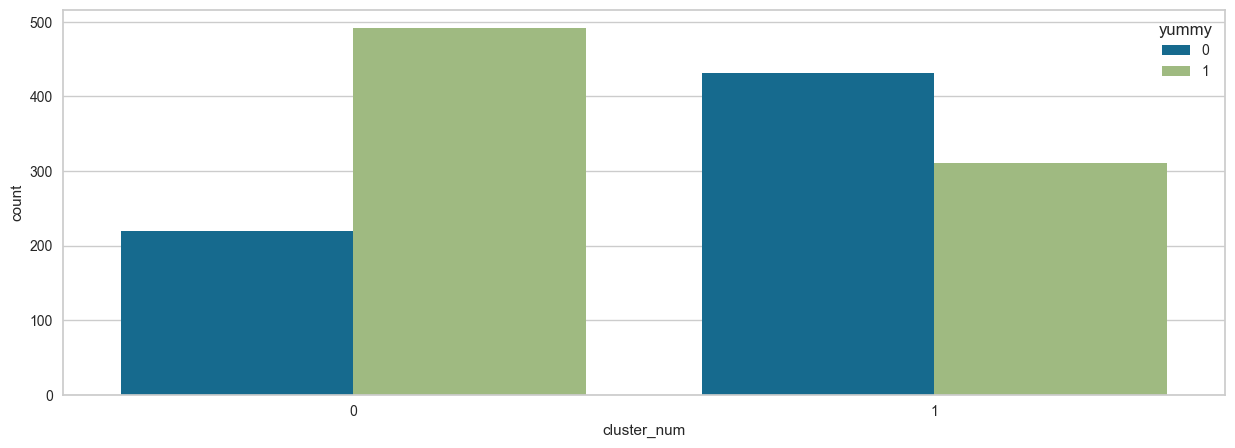

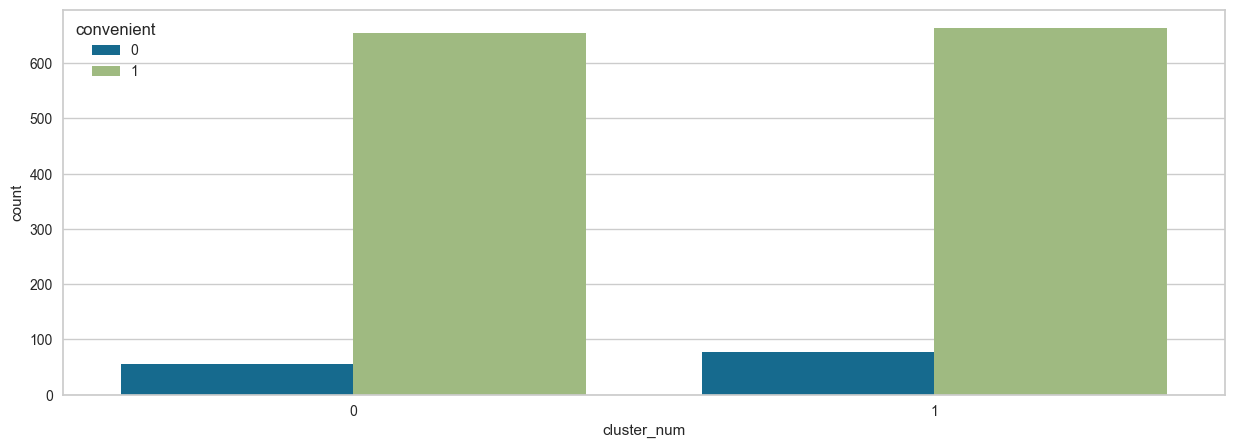

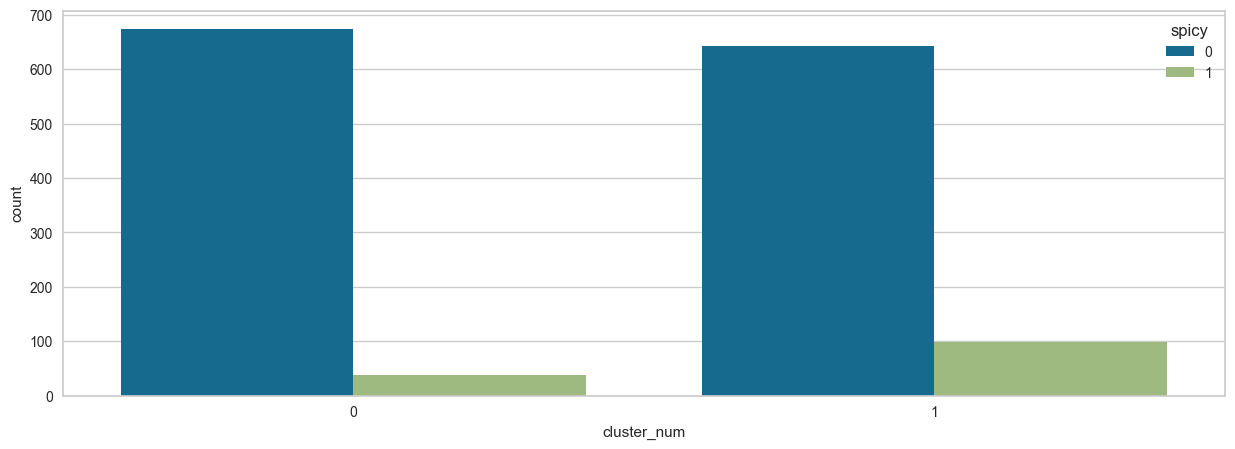

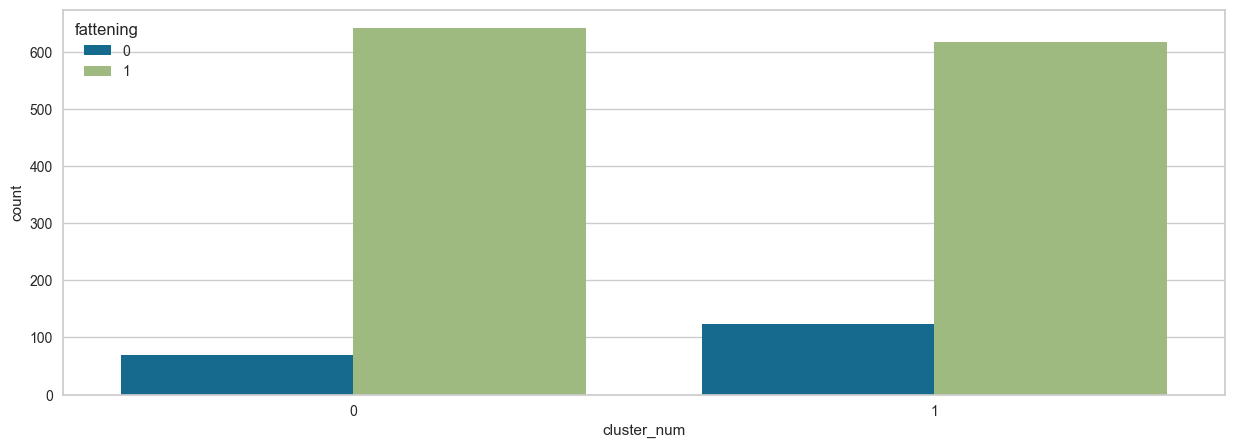

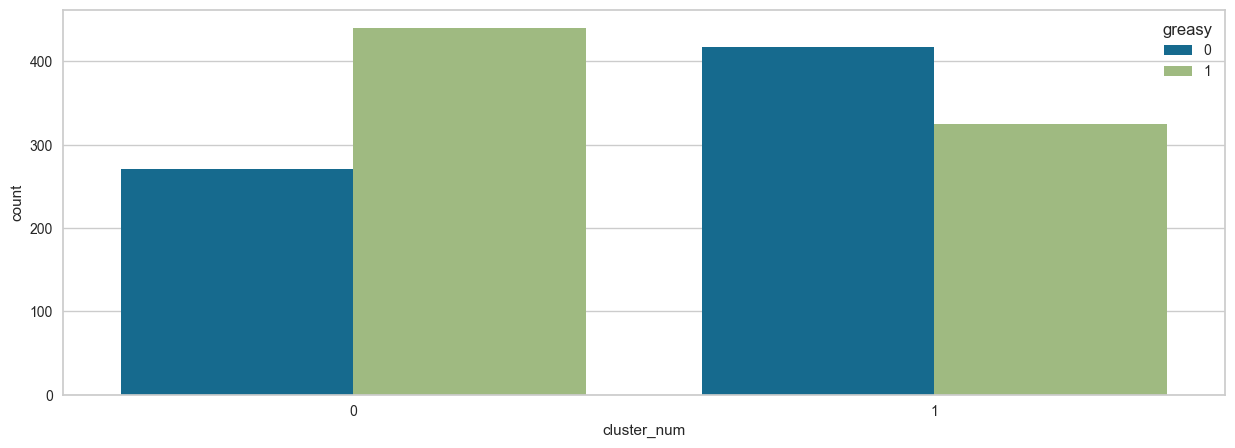

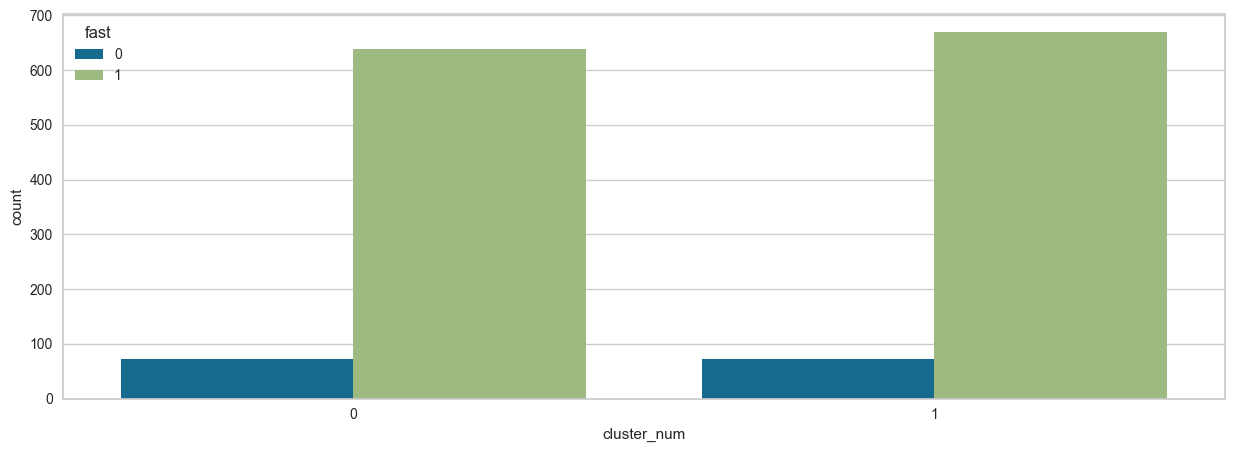

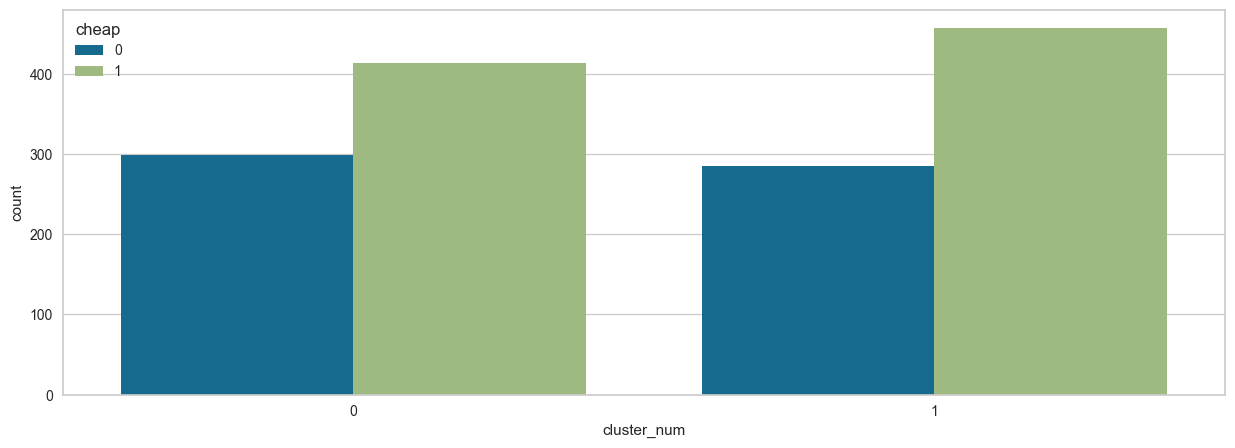

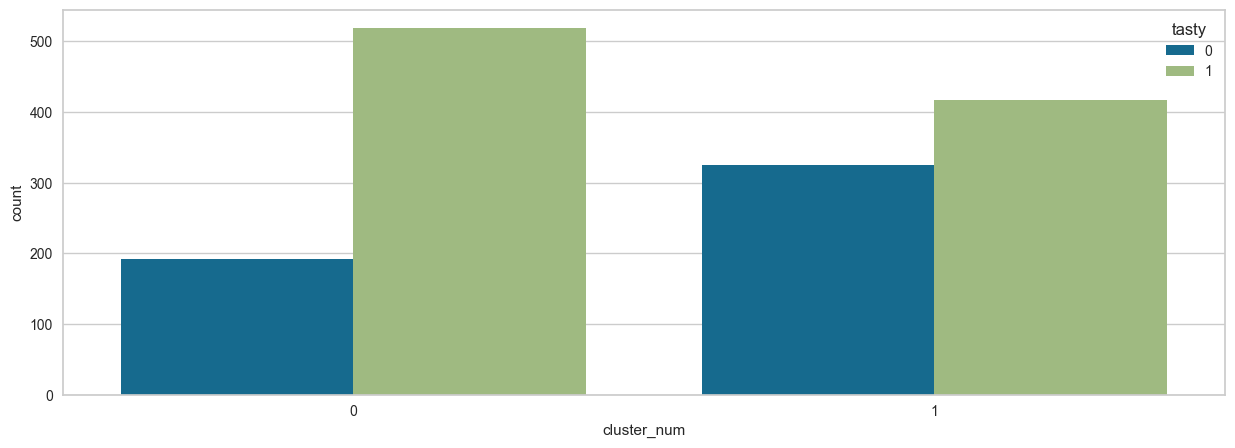

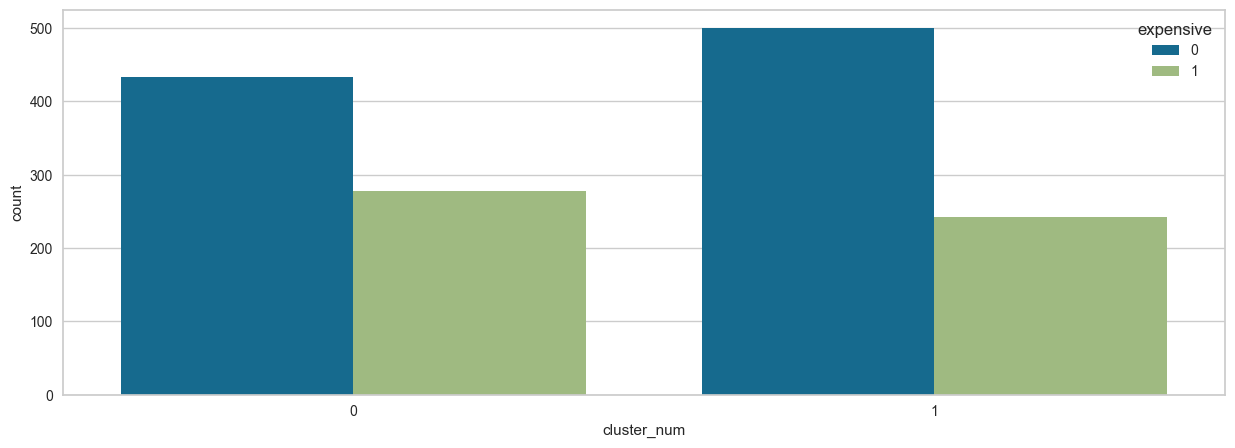

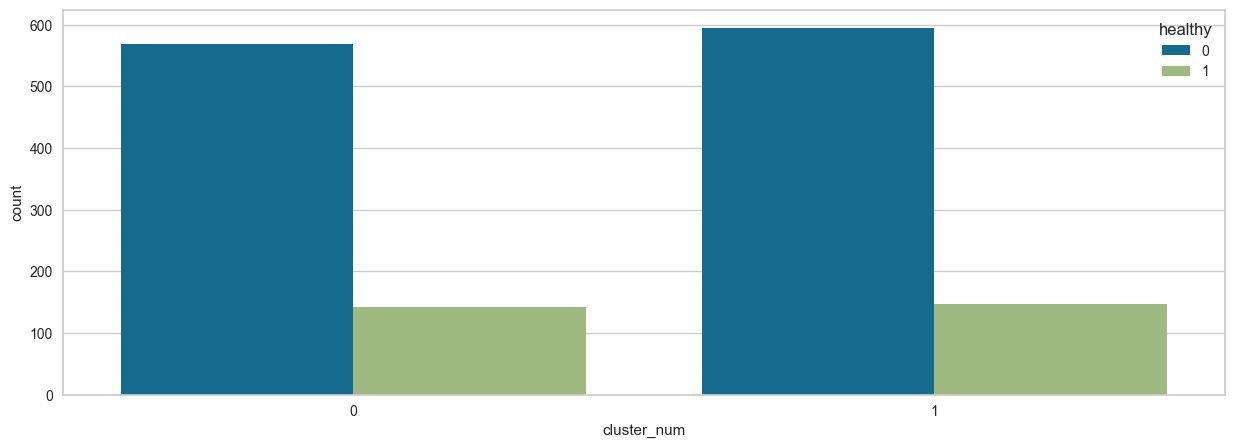

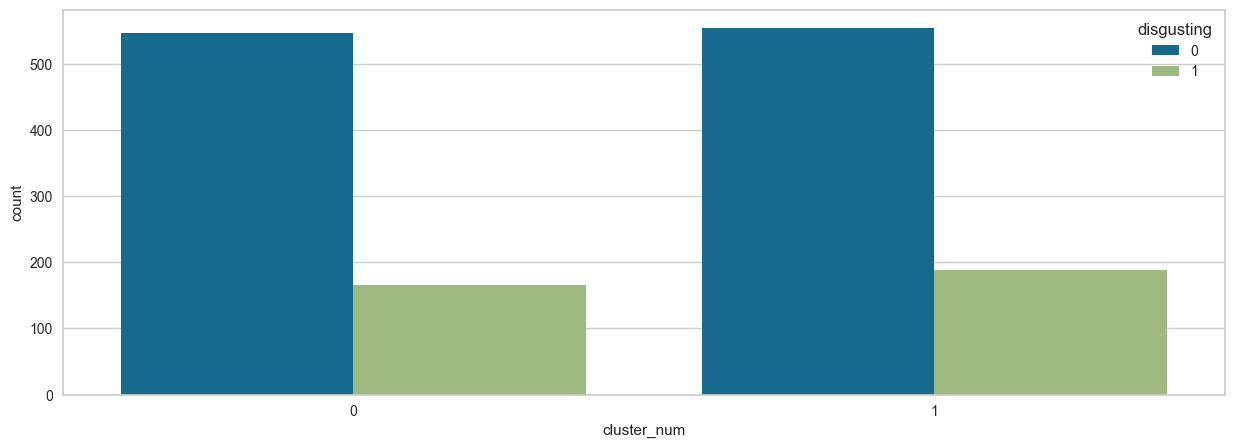

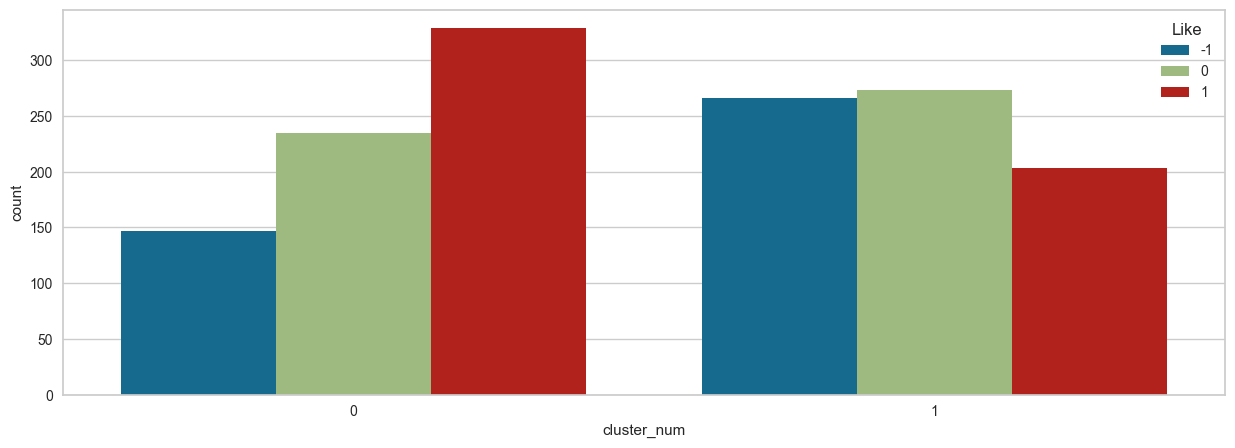

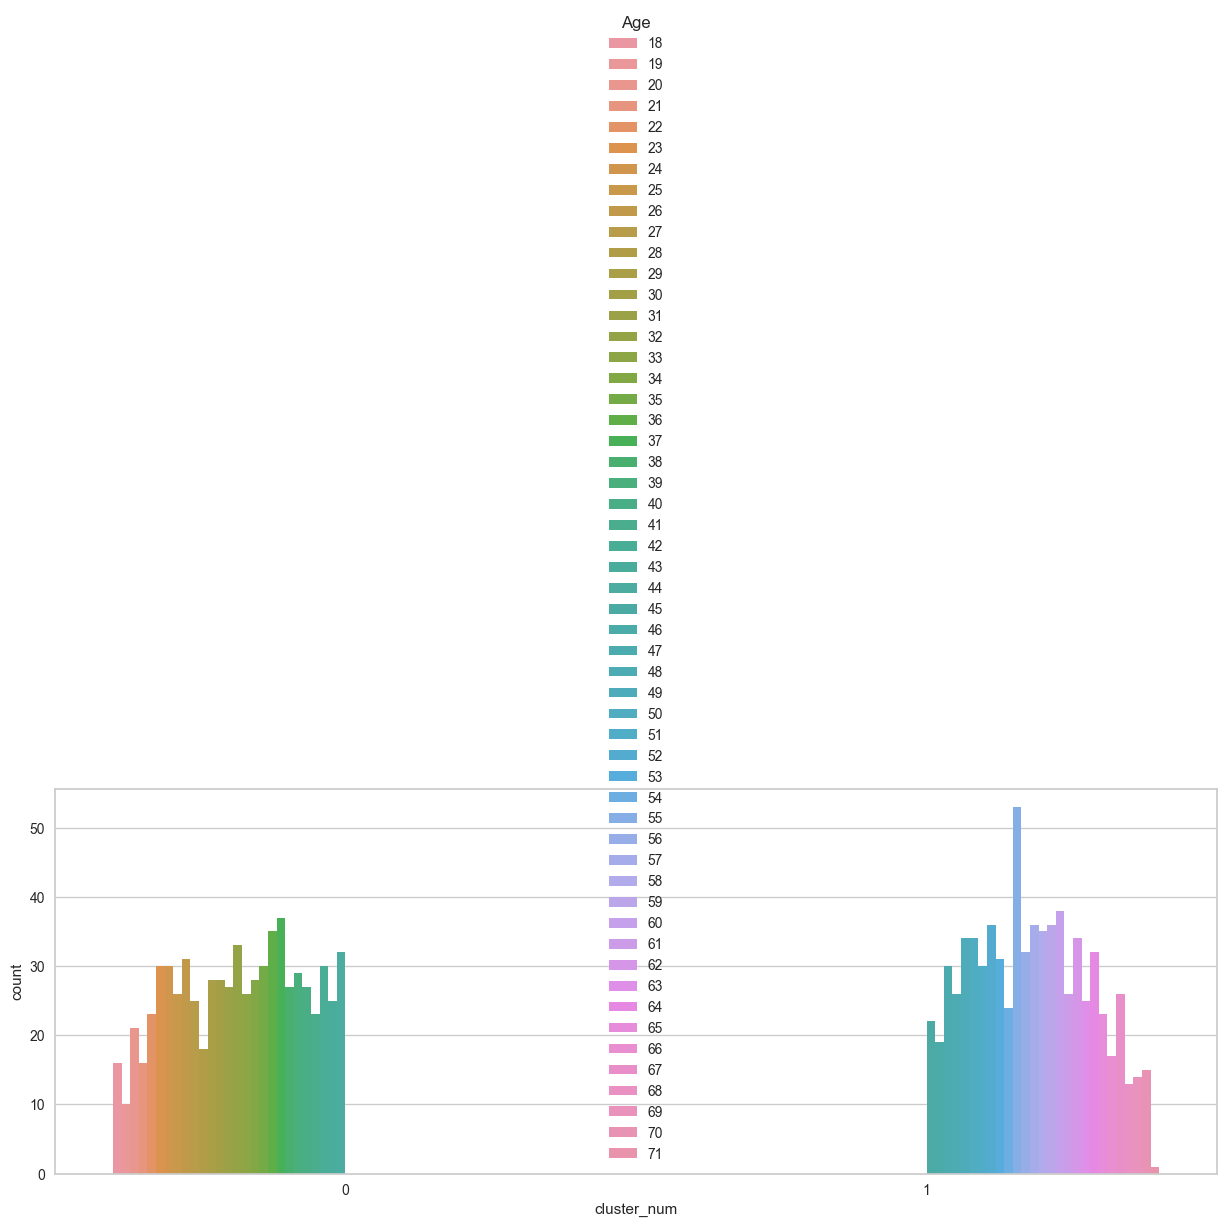

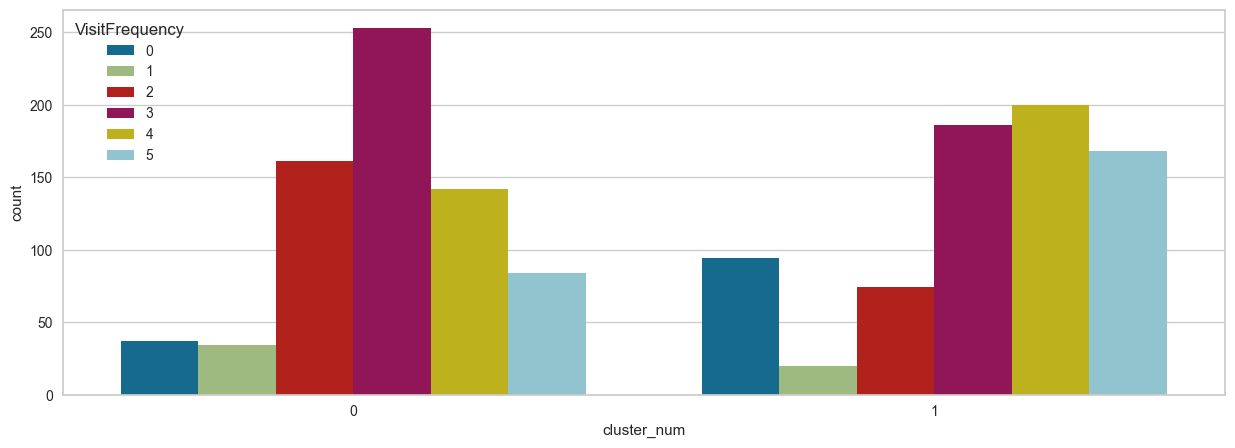

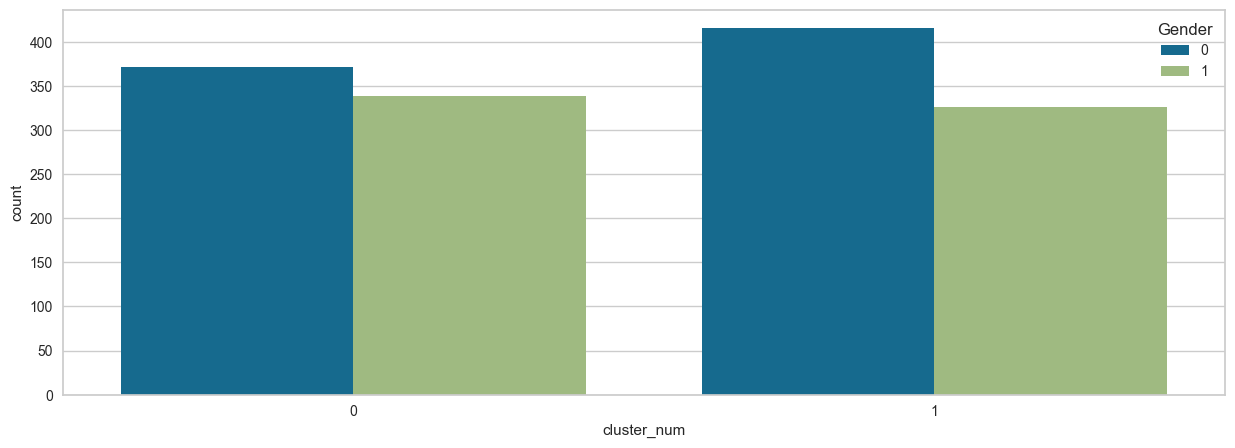

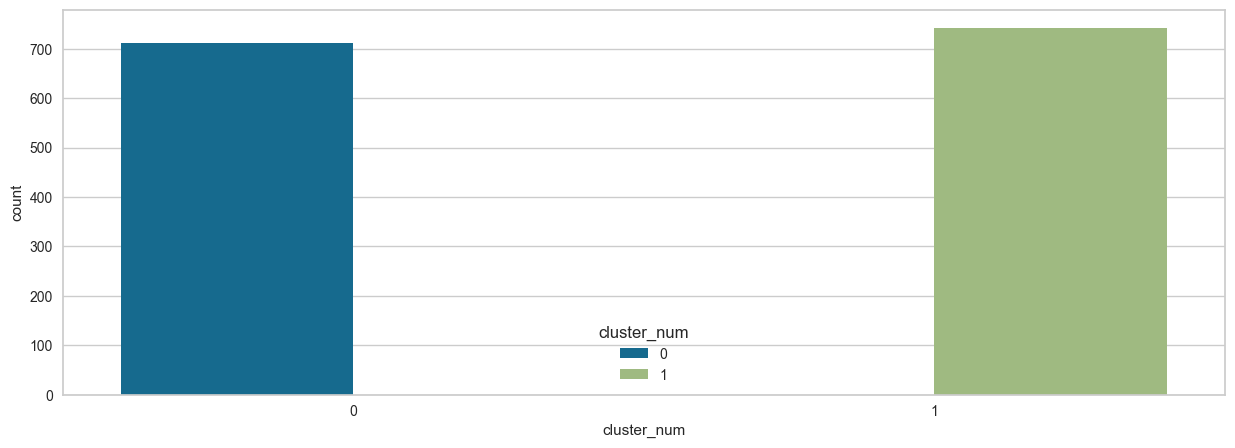

In [40]:
for col in df:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='cluster_num',hue=col, data = df)
    plt.show()

In [39]:
df


yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  Like  Age  VisitFrequency  Gender  \
0             1        0           0    -1   61               4       0   
1             1        0           0     0   51               4       0   
2             1        1           0     0   62               4       0   
3             0        0           1     1   69               2       0   
4             0        1           0     0   49               3       1   
...         ...      ...         ...   ...  ...             ...     ...   
1448          1        0           1    -1   47               5       1   
1449          0        1           0     0   36               2       0   
1450          1        0           0     1   52               3       0   
1451          0        1           0     1   41               4       1   
1452          1        0           1    -1   30               4       1   

      cluster_num  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
1448            1  
1449            0  
1450            1  
1451            0  
1452            0  

[1453 rows x 16 columns]

## Describing Segments

In [41]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

## Mosaic plot gender vs segment

In [42]:
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender         0    1
cluster_num          
0            372  339
1            416  326

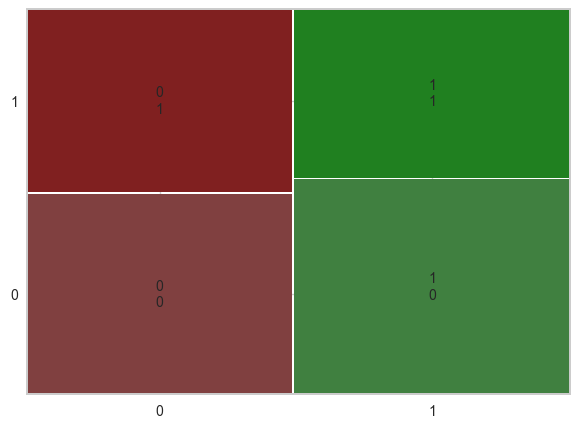

In [43]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

## Mosaic plot Yummy vs Segments

In [44]:
crosstab_yummy =pd.crosstab(df['cluster_num'],df['yummy'])
crosstab_yummy

# 1 = Yes, 0 = No

yummy          0    1
cluster_num          
0            219  492
1            431  311

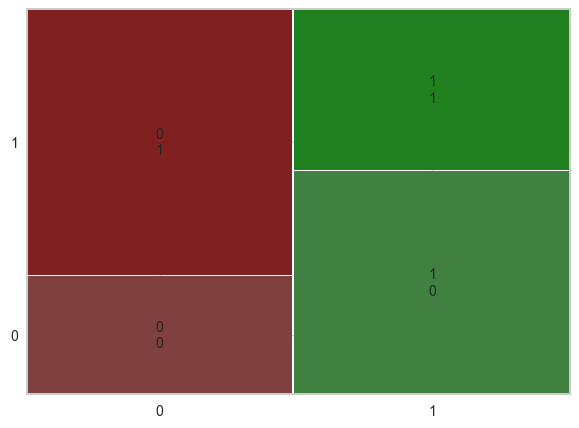

In [45]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_yummy.stack())
plt.show()

## Mosaic plot Disgusting vs Segments

In [46]:
crosstab_disg =pd.crosstab(df['cluster_num'],df['disgusting'])
crosstab_disg

# 1 = Yes, 0 = No

disgusting     0    1
cluster_num          
0            546  165
1            554  188

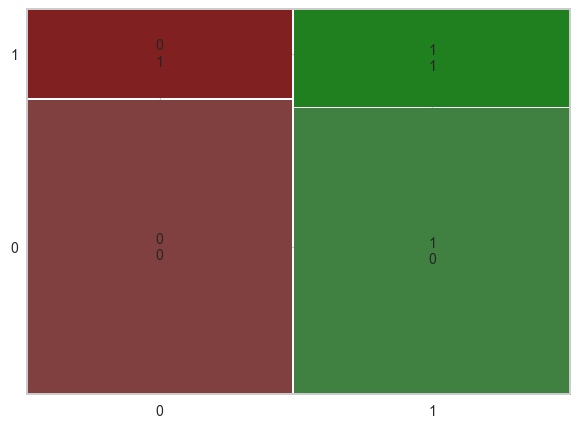

In [47]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_disg.stack())
plt.show()

<AxesSubplot: xlabel='cluster_num', ylabel='Age'>

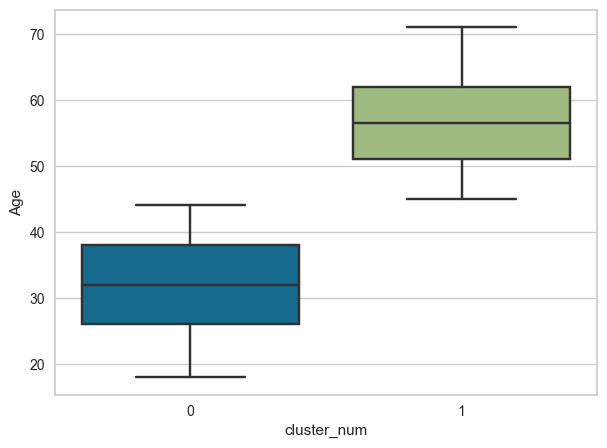

In [48]:
#ox plot for the Age group for both clusters
sns.boxplot(x="cluster_num", y="Age", data=df)

## Selecting Target Segment

In [49]:
from sklearn.preprocessing import LabelEncoder

In [52]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame()
visit

VisitFrequency
cluster_num                
0                  2.957806
1                  3.188679

In [53]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame()
Like

Like
cluster_num          
0            1.255977
1            0.915094

In [54]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame()
Gender

Gender
cluster_num          
0            0.476793
1            0.439353

In [55]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

Gender      Like  VisitFrequency
cluster_num                                    
0            0.476793  1.255977        2.957806
1            0.439353  0.915094        3.188679

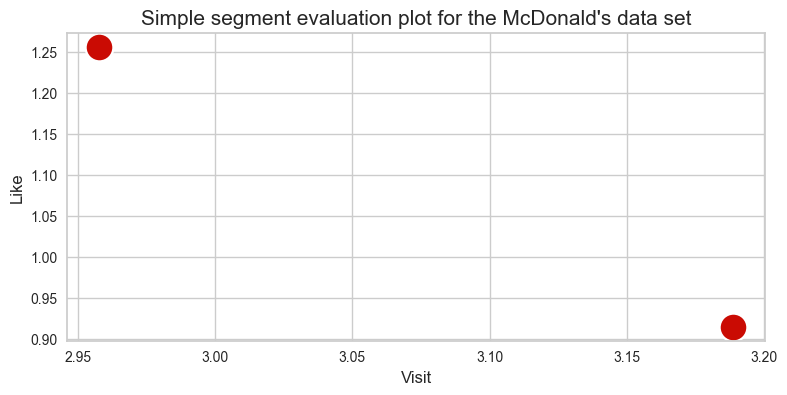

In [56]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the McDonald's data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()